# MACHINE LEARNING PROJECT

## Project: Predicting Players Rating

In this project you are going to predict the overall rating of soccer player based on their
attributes such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database

(https://www.kaggle.com/hugomathien/soccer)

has more than 25,000 matches and more
than 10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment

#### About the Dataset

The ultimate Soccer database for data analysis and
machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team
formations, with player names and a pair of coordinates to indicate their position on the pitch.

-+25,000 matches

-+10,000 players

-11 European Countries with their lead championship

-Seasons 2008 to 2016

-Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including
the weekly updates

-Team line up with squad formation (X, Y coordinates)

-Betting odds from up to 10 providers

-Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for
+10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA
video games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

#### Import Libraries

In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

#### Read Data from the Database into pandas

In [23]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')

In [26]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [27]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

No null values in data

4 objects data, some of column not affecting ratings

In [36]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,183978,NaN,NaN,NaN,91989.5,53110,1,45995.2,91989.5,137984,183978
player_fifa_api_id,183978,NaN,NaN,NaN,165672,53851.1,2,155798,183488,199848,234141
player_api_id,183978,NaN,NaN,NaN,135901,136928,2625,34763,77741,191080,750584
date,183978,197,2007-02-22 00:00:00,11794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall_rating,183142,NaN,NaN,NaN,68.6,7.04114,33,64,69,73,94
potential,183142,NaN,NaN,NaN,73.4604,6.59227,39,69,74,78,97
preferred_foot,183142,2,right,138409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_work_rate,180748,8,medium,125070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defensive_work_rate,183142,19,medium,130846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crossing,183142,NaN,NaN,NaN,55.0869,17.2421,1,45,59,68,95


In [33]:
df.shape

(183978, 42)

In [34]:
# Check any Nan values
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [37]:
# we can drop data that are not required 
df = df.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1)

In [38]:
df.shape

(183978, 38)

Convert words type data to string

In [60]:
df["preferred_foot"] = df["preferred_foot"].astype(str)
df["attacking_work_rate"] = df["attacking_work_rate"].astype(str)
df["defensive_work_rate"] = df["defensive_work_rate"].astype(str)

In [61]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna((df[i].mode()), inplace=True)
    else:
        df[i].fillna((df[i].mean()), inplace=True)

In [63]:
df.isna().sum().any()

False

No NA values in data now

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()

In [66]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [69]:
df['preferred_foot'].value_counts()

2    138409
0     44733
1       836
Name: preferred_foot, dtype: int64

In [67]:
df['attacking_work_rate'].value_counts()

4    125070
1     42823
3      8569
0      3639
5      3230
6       348
8       106
2       104
7        89
Name: attacking_work_rate, dtype: int64

In [68]:
df['defensive_work_rate'].value_counts()

15    130846
13     27041
14     18432
10      2394
17      1550
16       836
1        441
18       348
2        342
3        258
5        234
7        217
0        197
6        197
9        152
4        116
12       106
11       104
19        89
8         78
Name: defensive_work_rate, dtype: int64

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

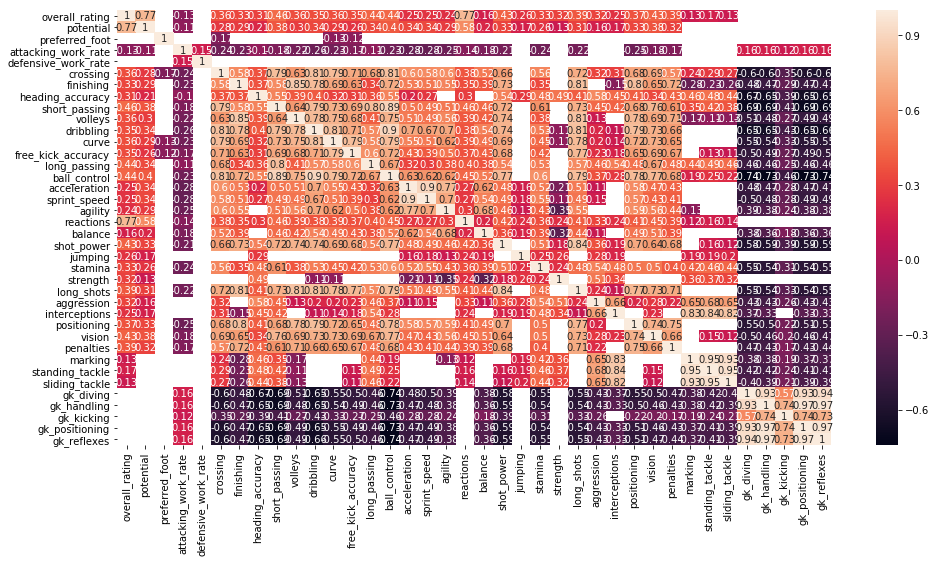

In [73]:
plt.subplots(figsize=(16,8))
sns.heatmap (df.corr()[df.corr().abs()>0.1],annot=True)

In [74]:
df_new = df.drop("overall_rating", axis =1)
df_new.head(3)

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,2,4,15,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,2,4,15,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,2,4,15,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [75]:
df_y = df["overall_rating"]

### Build Model

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf

In [79]:
ml = LinearRegression()

In [83]:
ml.fit(df_new,df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
print(ml.coef_)
print(ml.intercept_)
print(ml.score(df_new,df_y))

[ 0.37963696  0.0052076  -0.0487319  -0.0356668   0.02177502  0.01138002
  0.06966849  0.05077631  0.00326445 -0.01221248  0.01084055  0.01362755
  0.00699842  0.13561611  0.005794    0.00944056 -0.00917514  0.20841441
  0.0075543   0.01637191  0.0160588  -0.0057147   0.06138776 -0.01275075
  0.01957101  0.01263283 -0.01011518 -0.0025385   0.01395892  0.03292511
  0.00370466 -0.02947537  0.16633281  0.03193866 -0.03277993  0.05397724
  0.0234522 ]
-2.841407542152183
0.8415096792917272


### We are getting 84.1% accuracy, which is good

In [87]:
lm = smf.ols(formula='overall_rating ~ potential+preferred_foot+attacking_work_rate+defensive_work_rate+crossing+finishing+heading_accuracy\
+short_passing+volleys+dribbling+curve+free_kick_accuracy+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+ strength\
+long_shots+aggression+interceptions+positioning+vision+penalties+marking+standing_tackle+sliding_tackle+gk_diving+gk_handling+gk_kicking\
+gk_positioning+gk_reflexes', data = df).fit()
print(lm.conf_int())
print(lm.summary())

                            0         1
Intercept           -3.277490 -2.817476
potential            0.407406  0.413014
preferred_foot      -0.005554  0.026021
attacking_work_rate -0.050124 -0.029519
defensive_work_rate -0.043279 -0.026100
crossing             0.023658  0.026983
finishing            0.009530  0.013171
heading_accuracy     0.070409  0.073637
short_passing        0.091012  0.095689
volleys              0.002097  0.005343
dribbling            0.023763  0.028021
curve                0.014263  0.017432
free_kick_accuracy   0.013106  0.015919
sprint_speed         0.009435  0.013123
agility             -0.005365 -0.001421
reactions            0.214643  0.218910
balance              0.007748  0.010842
shot_power           0.016930  0.020413
jumping              0.013944  0.016857
stamina             -0.006260 -0.003017
strength             0.061551  0.064875
long_shots          -0.014943 -0.011327
aggression           0.018768  0.021498
interceptions        0.011196  0.014062


## Project: Application of Classification Model

This data was extracted from the census bureau database found at

http://www.census.gov/ftp/pub/DES/www/welcome.html

Donor: Ronny Kohavi and Barry Becker, Data Mining and
Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.

Dataset Link

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/



In [4]:
!pip install xgboost

     |████████████████████████████████| 142.8MB 992bytes/s  0:00:01   |                                | 256kB 1.8MB/s eta 0:01:21     |█                               | 4.8MB 704kB/s eta 0:03:17     |█▏                              | 5.0MB 704kB/s eta 0:03:16     |██                              | 9.4MB 340kB/s eta 0:06:33     |████                            | 17.6MB 65kB/s eta 0:32:00     |█████▎                          | 23.4MB 1.6MB/s eta 0:01:15     |██████                          | 27.0MB 968kB/s eta 0:02:00     |██████▏                         | 27.4MB 968kB/s eta 0:02:00     |████████▎                       | 37.2MB 138kB/s eta 0:12:41     |█████████▌                      | 42.5MB 542kB/s eta 0:03:06     |█████████▋                      | 42.9MB 430kB/s eta 0:03:53     |██████████▍                     | 46.5MB 1.2MB/s eta 0:01:19     |██████████▌                     | 47.0MB 621kB/s eta 0:02:35███▍                  | 59.7MB 139kB/s eta 0:09:56███▌                  | 60.3MB 1

In [5]:
# Imports various modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from xgboost import plot_tree
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Import data
train_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)
test_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test" , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status', 'occupation','relationship', 'race','sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']

In [7]:
train_set.columns = col_labels
test_set.columns = col_labels

In [8]:
train_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [9]:
test_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [10]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [11]:
# Convert binary columns in to Numeric though Label encoder
le=LabelEncoder()
for i in train_set.columns:
    if train_set[i].dtype =='object':
        train_set[i] = le.fit_transform(train_set[i])
train_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0


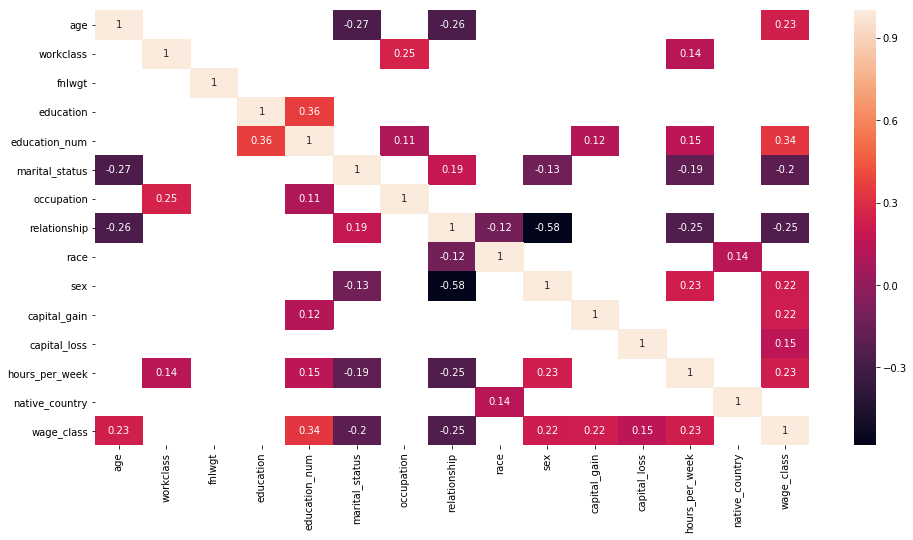

In [12]:
plt.subplots(figsize=(16,8))
sns.heatmap (train_set.corr()[train_set.corr().abs()>0.1],annot=True)

In [13]:
#Check if there are missing values
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [15]:
#wage_class over 50k is labelled as '1' & less or equal labelled as '0'
print ("Train set wage class type:",train_set["wage_class"].unique())
print ('Test set wage class type:',test_set["wage_class"].unique())

Train set wage class type: [0 1]
Test set wage class type: [' <=50K.' ' >50K.']


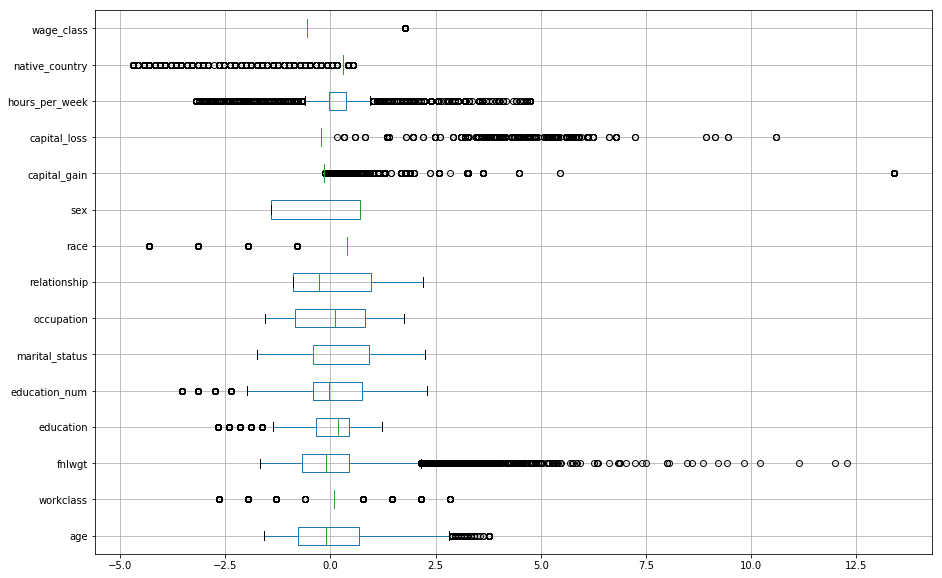

In [16]:
#Outlier check
from sklearn.preprocessing import StandardScaler
x=train_set
scaler=StandardScaler().fit(x)

y=pd.DataFrame(scaler.transform(x),columns=x.columns)
y.boxplot(vert=False,figsize=(15,10))

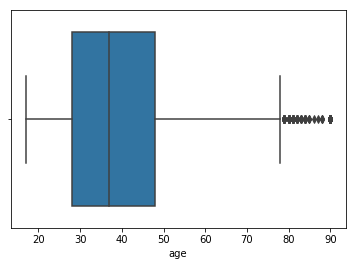

In [17]:
sns.boxplot(train_set["age"])

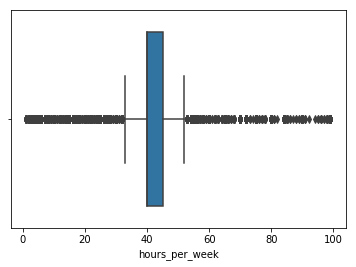

In [18]:
sns.boxplot(train_set["hours_per_week"])

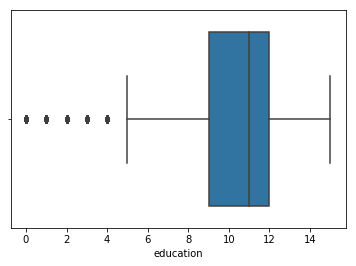

In [19]:
sns.boxplot(train_set["education"])

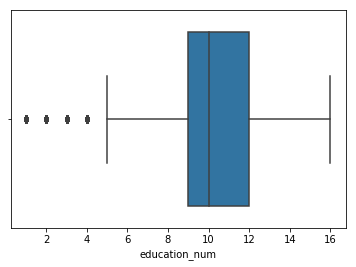

In [20]:
sns.boxplot(train_set["education_num"])

In [21]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561.0,3.868892,1.455960,0.0,4.0,4.0,4.0,8.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561.0,10.298210,3.870264,0.0,9.0,11.0,12.0,15.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
marital_status,32561.0,2.611836,1.506222,0.0,2.0,2.0,4.0,6.0
occupation,32561.0,6.572740,4.228857,0.0,3.0,7.0,10.0,14.0
relationship,32561.0,1.446362,1.606771,0.0,0.0,1.0,3.0,5.0
race,32561.0,3.665858,0.848806,0.0,4.0,4.0,4.0,4.0
sex,32561.0,0.669205,0.470506,0.0,0.0,1.0,1.0,1.0


In [22]:
X = train_set.drop(['fnlwgt', 'workclass', 'occupation','marital_status','relationship','race', 'native_country','wage_class'],axis=1)
Y = train_set.wage_class
col_name = X.columns
print(col_name)

Index(['age', 'education', 'education_num', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week'],
      dtype='object')


In [23]:
# Remove outliers
def remove_outlier(X, col_name):
    q1 = X[col_name].quantile(0.25)
    q3 = X[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    X = X.loc[(X[col_name] > fence_low) & (X[col_name] < fence_high)]
    return X
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education,32561.0,10.298210,3.870264,0.0,9.0,11.0,12.0,15.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
sex,32561.0,0.669205,0.470506,0.0,0.0,1.0,1.0,1.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [24]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.neighbors import KNeighborsClassifier


In [25]:
# Test, train split from train data set
test_size = 0.30
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [26]:
X_train.shape, X_test.shape

((22792, 7), (9769, 7))

In [30]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
# Spot-Check Algorithms
models = []
models.append(('Logistic', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB',XGBClassifier()))
models.append(('kNN',KNeighborsClassifier()))
models

[('Logistic',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('GB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
         max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
         n_estimators=100, n_jobs=1, nthread=None,
         objective='binary:logistic', random_state=0, reg_a

In [31]:
# evaluate each model in turn
num_folds = 10
seed = 7
scoring = 'accuracy'
results = []
names = []
model_comp=pd.DataFrame(columns=['Model','Test Accuracy','Std.Dev'])

for name, model in models:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Test Accuracy':cv_results.mean(), 'Std.Dev':cv_results.std()}],ignore_index=True)
    
model_comp

,Model,Test Accuracy,Std.Dev
0,Logistic,0.822789,0.006517
1,CART,0.814058,0.007691
2,GB,0.846745,0.004708
3,kNN,0.826080,0.006083


In [32]:
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
cv_results

array([0.82017544, 0.81666667, 0.82009653, 0.82843352, 0.83106626,
       0.82580079, 0.81439228, 0.81834138, 0.83501536, 0.81790259])

In [33]:
from sklearn.model_selection import RandomizedSearchCV

# The max_depth parameter denotes maximum depth of the tree. 
#It can take any integer value or None. If None, then nodes 
# are expanded until all leaves are pure or until all leaves
#contain less than min_samples_split samples.
# By default, it takes “None” value.

max_depth = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)]
max_depth.append(None)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# min_impurity_split: It defines the threshold for early stopping tree
#growth. 
# A node will split if its impurity is above the threshold otherwise it is a leaf.
min_impurity_split = [0.7,0.8]


# Minimum number of samples required to split a node
# This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken
# then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
# The minimum number of samples required to be at a leaf node. If an integer value is taken
# then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
                'min_impurity_split' :min_impurity_split}
print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [2, 5, 10], 'min_impurity_split': [0.7, 0.8]}


In [34]:
model=DecisionTreeClassifier(max_depth=5)
print(model)
model=model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8321340821340821
0.8284368922100522


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=False, random_state=42,n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train,Y_train)
print(dt_random.best_params_)
print(dt_random.score(X_test,Y_test))

{'min_samples_split': 2, 'min_impurity_split': 0.7, 'max_features': 'auto', 'max_depth': 2}
0.758828948715324


In [38]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': [2,4,5] ,
    'min_impurity_split': [0.1,0.4,0.7,0.8],
    'max_features': ['auto'],
    'max_depth': [2,5,8,15]
}
# Create a based model
# dt = DecisionTreeClassifier()
# # Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = False)

grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
print(best_grid)
grid_search.score(X_test,Y_test)

{'max_depth': 8, 'max_features': 'auto', 'min_impurity_split': 0.1, 'min_samples_split': 4}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=0.1,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


0.8355000511823114

### Testing Model

In [89]:
model = DecisionTreeClassifier()
model=model.fit(X_train,Y_train)
X_train.columns

Index(['age', 'education', 'education_num', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week'],
      dtype='object')

In [90]:
# 2nd Example from train data set
model.predict_proba(np.array([[50, 9, 13, 1, 0, 0,13]]))  # age 50, Bach, Edu num=13, Male, hours pr week 13

array([[1., 0.]])

#### There is 0%; chances he can make >=50k anually.

In [83]:
# 3rd Example from train data set
model.predict_proba(np.array([[38, 11, 9, 1, 0, 0,40]]))  # age 38, HS Grad, Edu num=9, Male, hours pr week 40

array([[0.76190476, 0.23809524]])

#### There is 24%; chances he can make >=50k anually.

In [53]:
train_set.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
6,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
7,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
8,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
9,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1


In [84]:
# 2nd last Example from train data set
model.predict_proba(np.array([[31, 12, 14, 0, 14084, 0,50]]))  # age 31, Masters, Edu num=14, FeMale, hours pr week 50

array([[0., 1.]])

#### There is 100%; chances she can make >=50k anually (as seen in data itself).

#### Problem 1:Prediction task is to determine whether a person makes over 50K a year.


In [86]:
# 3rd last Example from train data set
model.predict_proba(np.array([[52, 11, 9, 1, 0, 0,45]]))  # age 31, Masters, Edu num=14, FeMale, hours pr week 50

array([[0.5, 0.5]])

#### Problem 2:Which factors are important


Looking at correlation plot , 'fnlwgt', 'workclass', 'occupation', 'marital status','relationship','race', 'native country' have less correlation with wage_class.

While  'education_num' have strong impact & 'age', 'sex', 'capital_gain', 'capital_loss', 'hours_er_week' have light effect on wage_class

#### Problem 3:Which algorithms are best for this dataset

Xgboost model give highest accuracy score for the dat

## Project: Application of Clustering Model

### Dataset Link
https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

Hint:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'linalg', 'random', 'power', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
data = pd.read_csv("data_stocks.csv")

In [3]:
data.shape

(41266, 502)

k-Means Algorithm
=================

In [5]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
from datetime import date

In [5]:
data["Year"] = pd.DatetimeIndex(pd.to_datetime(data["DATE"], unit='s')).year
data["Month"] = pd.DatetimeIndex(pd.to_datetime(data["DATE"], unit='s')).month
data["Day"] = pd.DatetimeIndex(pd.to_datetime(data["DATE"], unit='s')).day

In [10]:
data.head(3)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Year,Month,Day
0,1491226200,2363.6101,42.33,143.6800,129.630,82.04,102.2300,85.22,59.760,121.52,...,39.88,82.03,7.36,50.22,63.86,122.00,53.350,2017,4,3
1,1491226260,2364.1001,42.36,143.7000,130.320,82.08,102.1400,85.65,59.840,121.48,...,39.88,82.03,7.38,50.22,63.74,121.77,53.350,2017,4,3
2,1491226320,2362.6799,42.31,143.6901,130.225,82.03,102.2125,85.51,59.795,121.93,...,39.98,82.02,7.36,50.12,63.75,121.70,53.365,2017,4,3


In [6]:
DateNew = pd.to_datetime(data["DATE"], unit='s')
DateNew.head()

0   2017-04-03 13:30:00
1   2017-04-03 13:31:00
2   2017-04-03 13:32:00
3   2017-04-03 13:33:00
4   2017-04-03 13:34:00
Name: DATE, dtype: datetime64[ns]

In [7]:
YrMnDy = data[["Year","Month","Day"]]
YrMnDy["DATE"] = DateNew
Stck = data.drop(["DATE","SP500","Year","Month","Day"], axis=1)
Stck.head(3)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.33,143.6800,129.630,82.04,102.2300,85.22,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.350
1,42.36,143.7000,130.320,82.08,102.1400,85.65,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.350
2,42.31,143.6901,130.225,82.03,102.2125,85.51,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.70,53.365


In [13]:
YrMnDy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 4 columns):
Year     41266 non-null int64
Month    41266 non-null int64
Day      41266 non-null int64
DATE     41266 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.3 MB


In [14]:
Stck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 501 entries, SP500 to NYSE.ZTS
dtypes: float64(501)
memory usage: 157.7 MB


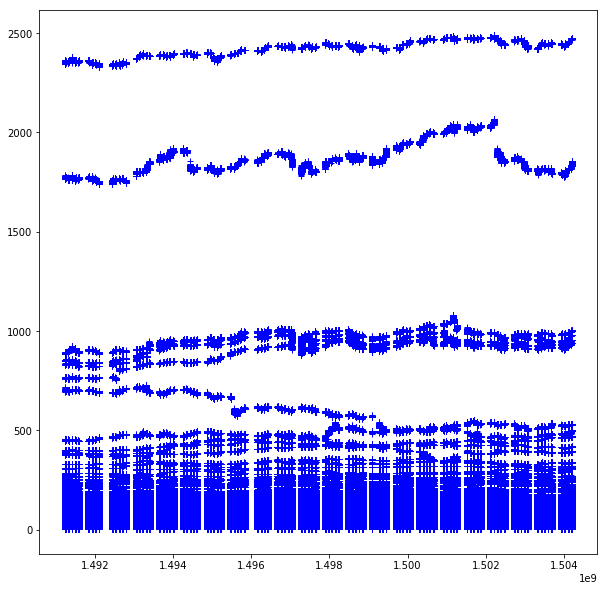

In [15]:
figsize(10,10)
plot(data["DATE"], Stck,'b+')

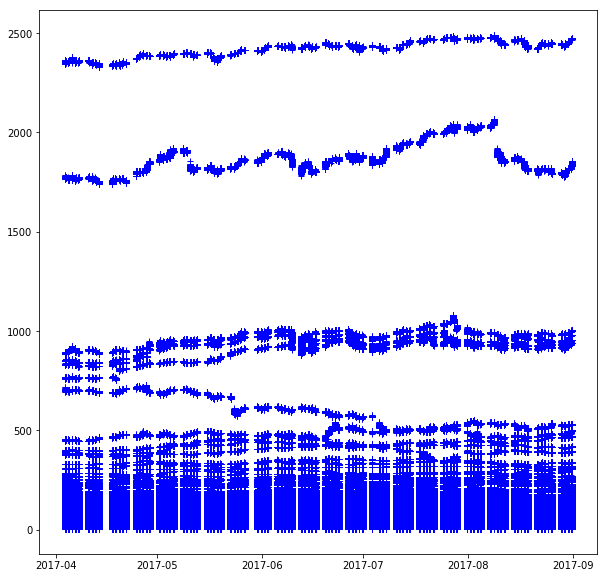

In [16]:
figsize(10,10)
plot(YrMnDy["DATE"], Stck,'b+')

In [8]:
from sklearn.cluster import *
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [9]:
from sklearn.preprocessing import StandardScaler
norm_df = StandardScaler().fit_transform(Stck)

In [38]:
#kmeans = KMeans(n_clusters=5,n_init = 100).fit(Stck)

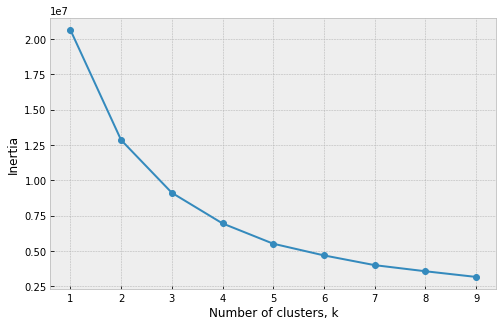

In [9]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(norm_df)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [10]:
def k_means(n_clust, data_frame, true_labels):
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia silhouette')
    print('%i    %.3f'
      %(k_means.inertia_,
      silhouette_score(data_frame, y_clust, metric='euclidean')))

In [10]:
Labels = Stck.columns

In [11]:
stck_t = Stck.T

In [15]:
# Check for 2 clusters
k_means(n_clust=2, data_frame=stck_t, true_labels=Labels)

orig_label,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
clust_label,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


inertia silhouette
123006116341    0.924


In [19]:
# Check for 5 clusters
stck_5 = k_means(n_clust=5, data_frame=stck_t, true_labels=Labels)

orig_label,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
clust_label,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,1,0,1,1,...,0,0,1,1,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


inertia silhouette
21196874808    0.609


In [12]:
from sklearn.cluster import *
kmeans = KMeans(n_clusters=5).fit(stck_t)
centroids = kmeans.cluster_centers_
y_km = kmeans.fit_predict(stck_t)
#y_km=pd.Series(y_km)

In [26]:
y_km = ravel(y_km)
len(y_km)

500

In [14]:
stck_t["clusters"] =y_km
stck_t.head()

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,clusters
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74,0
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98,4
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16,4
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69,0
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47,4


In [15]:
stck_t['clusters'].value_counts()

0    338
4    133
1     24
2      4
3      1
Name: clusters, dtype: int64

In [17]:
clust0 = stck_t.loc[stck_t["clusters"]==0].drop(["clusters"], axis=1).T

In [18]:
clust1 = stck_t.loc[stck_t["clusters"]==1].drop(["clusters"], axis=1).T
clust2 = stck_t.loc[stck_t["clusters"]==2].drop(["clusters"], axis=1).T
clust3 = stck_t.loc[stck_t["clusters"]==3].drop(["clusters"], axis=1).T
clust4 = stck_t.loc[stck_t["clusters"]==4].drop(["clusters"], axis=1).T

In [24]:
Stck.shape, stck_t['clusters'].shape

((41266, 500), (500,))

So we have 500 set of stocks & clusters identified for them from range 0-4

In [56]:
clust0.head()

,NASDAQ.AAL,NASDAQ.ADI,NASDAQ.AKAM,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.ATVI,NASDAQ.BBBY,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CERN,...,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZTS
0,42.3300,82.040,59.760,38.99,14.61,49.850,39.43,31.780,81.03,58.820,...,52.160,20.34,34.00,44.40,39.88,82.03,7.36,50.22,63.86,53.350
1,42.3600,82.080,59.840,39.01,14.71,49.940,39.68,31.780,81.21,58.495,...,52.245,20.32,34.07,44.11,39.88,82.03,7.38,50.22,63.74,53.350
2,42.3100,82.030,59.795,38.91,14.64,49.860,39.60,31.765,81.21,58.470,...,52.200,20.26,34.11,44.09,39.98,82.02,7.36,50.12,63.75,53.365
3,42.3700,82.000,59.620,38.84,14.63,49.915,39.57,31.830,81.13,58.420,...,52.140,20.20,33.97,44.25,39.99,82.02,7.35,50.16,63.88,53.380
4,42.5378,82.035,59.620,38.93,14.67,49.915,39.55,31.830,81.12,58.600,...,52.140,20.22,34.00,44.11,39.96,82.03,7.36,50.20,63.91,53.240


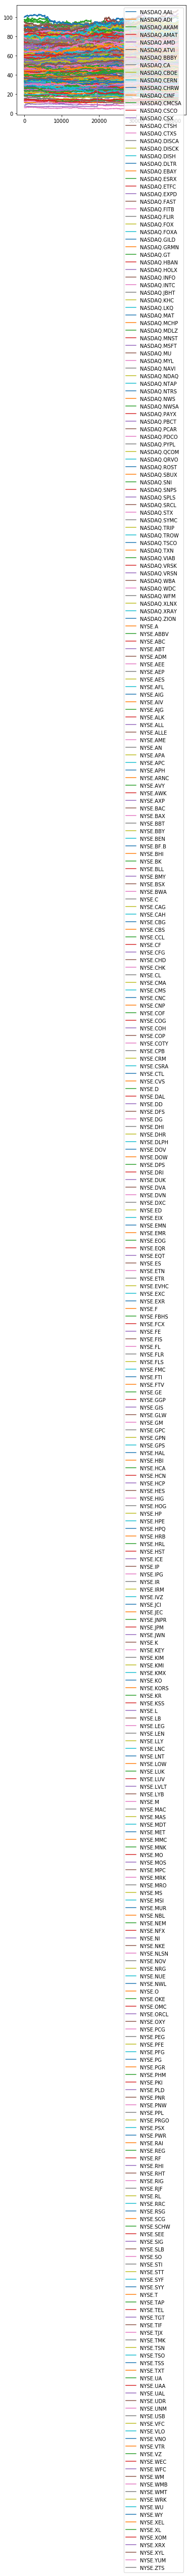

In [58]:
clust0.plot()

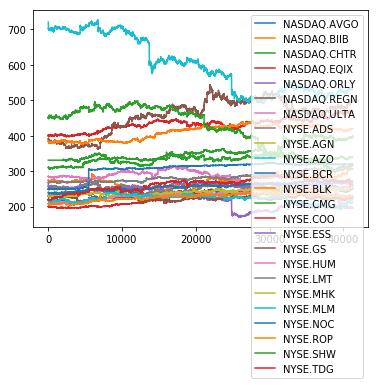

In [59]:
clust1.plot()

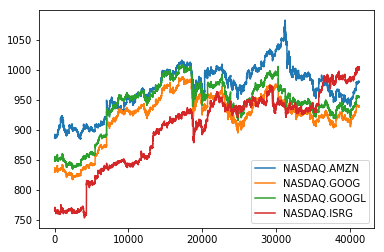

In [60]:
clust2.plot()

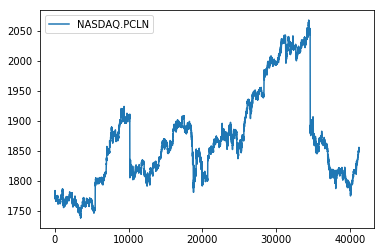

In [61]:
clust3.plot()

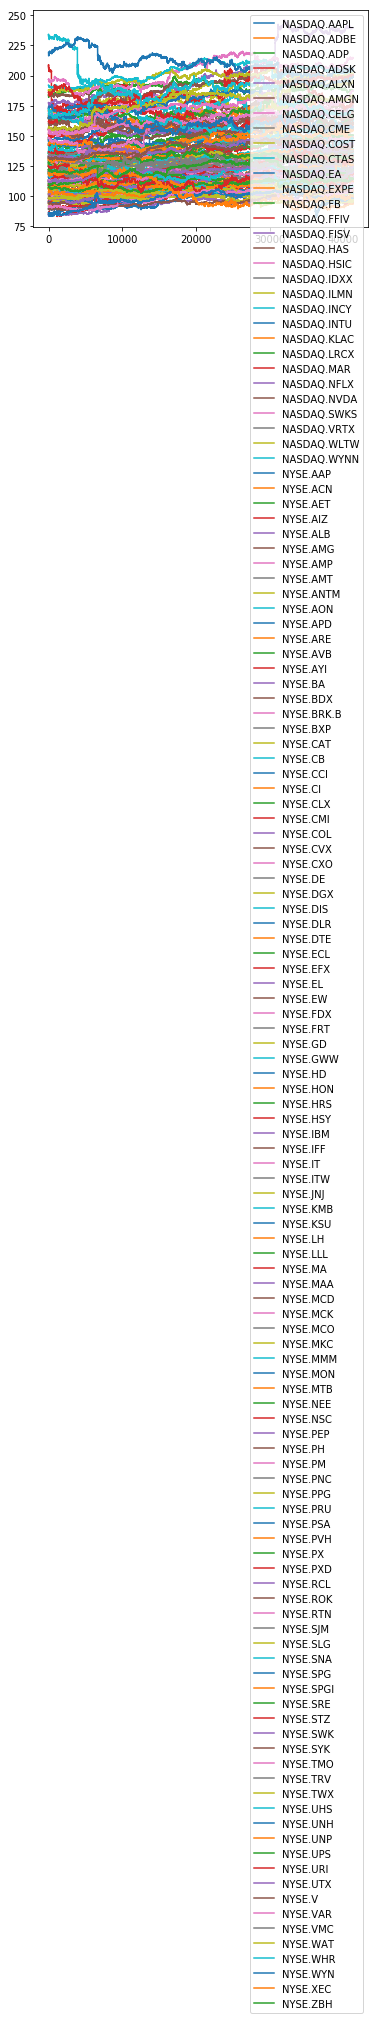

In [62]:
clust4.plot()

### Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance


Many Stocks in cluster=0 & 4 are similar in performance & very close to each other

### Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

From above processed data there are 3-4 unique patterns of the stock movements

### Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

AMZN, GOOG & GOOGL are stocks moving togather while ISRG moving differently on cluster=2, they are in cluster 0 & 3 too. On cluster=0 & 3 there are few stocks which are different from each others

## Project:Time Series Model

#### Dataset Link:
https://drive.google.com/file/d/1VxoJDgyiAdMRI7-Fp7RxazDTvQ9Lw54d/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline


In [2]:
df = pd.read_csv('data_stocks.csv')

In [25]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df["DATE"] =  pd.to_datetime(df["DATE"], unit='s')
#df["DATE"] = pd.to_datetime(df["DATE"],format='%Y/%m/%d').dt.strftime('%Y%m%d')

In [6]:
df_new = df.copy()
df_new = df_new.set_index("DATE")

In [8]:
df_new.head(3)

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.33,143.6800,129.630,82.04,102.2300,85.22,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.350
2017-04-03 13:31:00,2364.1001,42.36,143.7000,130.320,82.08,102.1400,85.65,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.350
2017-04-03 13:32:00,2362.6799,42.31,143.6901,130.225,82.03,102.2125,85.51,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.70,53.365


### Problem Statement: Pick up the following stocks and generate forecasts accordingly Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [11]:
StockInt = df_new[["NASDAQ.AAPL","NASDAQ.ADP","NASDAQ.CBOE","NASDAQ.CSCO","NASDAQ.EBAY"]]

In [12]:
StockInt.head(3)

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.74,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.88,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.90,33.4100


In [13]:
# Assign stocks of Interests
stck_AAPL = StockInt["NASDAQ.AAPL"]
stck_ADP = StockInt["NASDAQ.ADP"]
stck_CBOE = StockInt["NASDAQ.CBOE"]
stck_CSCO = StockInt["NASDAQ.CSCO"]
stck_EBAY = StockInt["NASDAQ.EBAY"]

In [14]:
stck_AAPL.loc["2017-04-03"].count()

391

There are 391 data points for Day (per minute), so total 6.5 hours data captured for day

In [15]:
stck_AAPL.shape

(41266,)

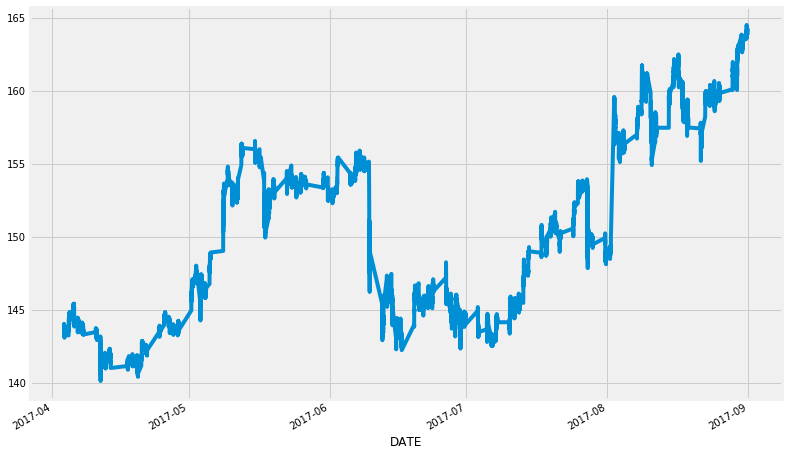

In [17]:
# show plots in the notebook
%matplotlib inline
stck_AAPL.plot(figsize=(12,8));

#### Auto-correlations
Before we decide which model to use, we need to look at auto-correlations.


In [19]:
#Import neccessary libraries
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [181]:
sm.stats.durbin_watson(stck_AAPL)

3.859214208142229e-07

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
%matplotlib inline
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#plot_acf(stck_AAPL)
ax2 = fig.add_subplot(212)
plot_pacf(stck_AAPL)

In [ ]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

### From above we can say it's 1st order

In [292]:
# SHift data by 391 steps
stck_AAPL.shift(391).head(393)

DATE
2017-04-03 13:30:00       NaN
2017-04-03 13:31:00       NaN
2017-04-03 13:32:00       NaN
2017-04-03 13:33:00       NaN
2017-04-03 13:34:00       NaN
2017-04-03 13:35:00       NaN
2017-04-03 13:36:00       NaN
2017-04-03 13:37:00       NaN
2017-04-03 13:38:00       NaN
2017-04-03 13:39:00       NaN
2017-04-03 13:40:00       NaN
2017-04-03 13:41:00       NaN
2017-04-03 13:42:00       NaN
2017-04-03 13:43:00       NaN
2017-04-03 13:44:00       NaN
2017-04-03 13:45:00       NaN
2017-04-03 13:46:00       NaN
2017-04-03 13:47:00       NaN
2017-04-03 13:48:00       NaN
2017-04-03 13:49:00       NaN
2017-04-03 13:50:00       NaN
2017-04-03 13:51:00       NaN
2017-04-03 13:52:00       NaN
2017-04-03 13:53:00       NaN
2017-04-03 13:54:00       NaN
2017-04-03 13:55:00       NaN
2017-04-03 13:56:00       NaN
2017-04-03 13:57:00       NaN
2017-04-03 13:58:00       NaN
2017-04-03 13:59:00       NaN
                        ...  
2017-04-03 19:33:00       NaN
2017-04-03 19:34:00       NaN
2017-

### Modeling Data

In [293]:
arma_mod10 = sm.tsa.ARMA(stck_AAPL, (1,0)).fit()
print(arma_mod10.params)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const                151.751240
ar.L1.NASDAQ.AAPL      0.999923
dtype: float64


In [294]:
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

-78420.86295663245 -78394.97957404642 -78412.68212065249


Does our model obey the theory? We will use the Durbin-Watson test for autocorrelation. The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [295]:
sm.stats.durbin_watson(arma_mod10.resid.values)

1.8649851102664279

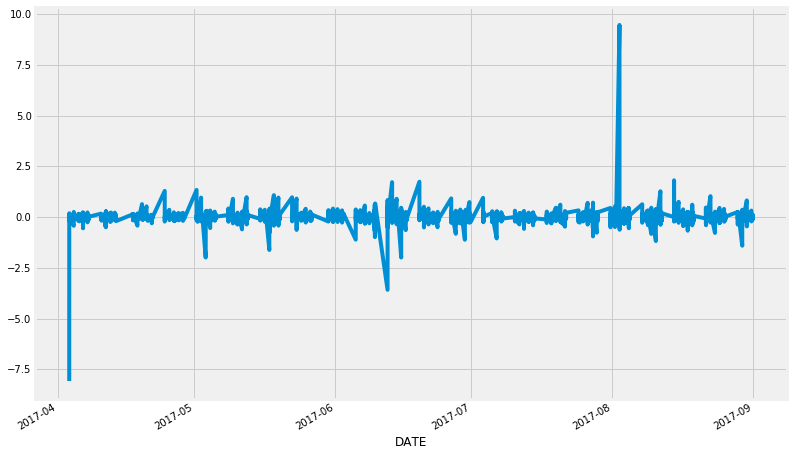

In [296]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod10.resid.plot(ax=ax);

#### Analyzing the Residuals

In [297]:
from scipy import stats
resid10 = arma_mod10.resid
stats.normaltest(resid10)

NormaltestResult(statistic=57768.26918418893, pvalue=0.0)

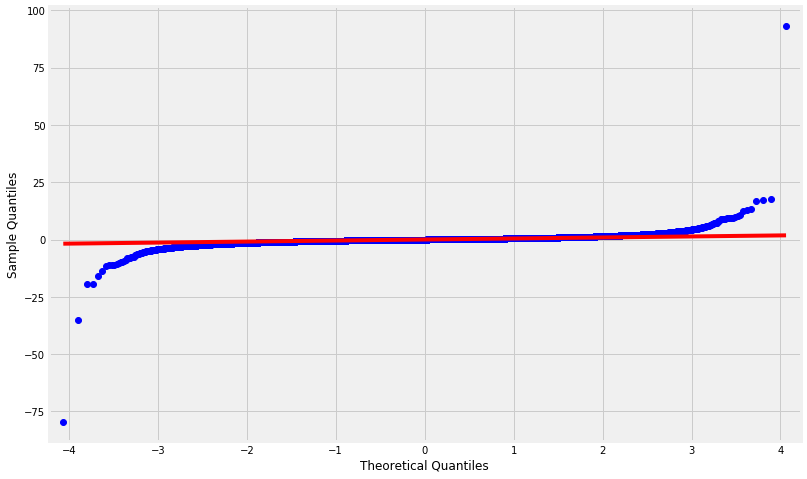

In [298]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid10, line='q', ax=ax, fit=True)

### Model Autocorrelation

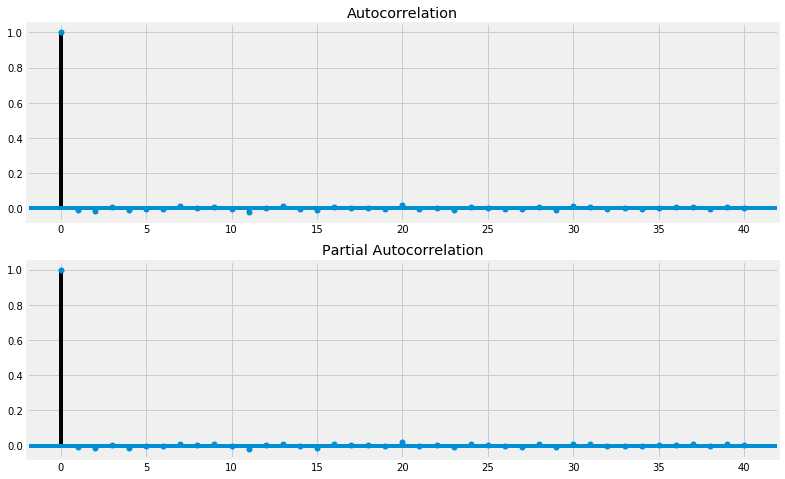

In [299]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid10.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid10, lags=40, ax=ax2)

In [300]:
r,q,p = sm.tsa.acf(resid10.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0  -0.008929    3.290293  6.969057e-02
2.0  -0.014838   12.376254  2.053670e-03
3.0   0.005453   13.603418  3.497820e-03
4.0  -0.012370   19.918351  5.182781e-04
5.0  -0.005123   21.001623  8.094877e-04
6.0  -0.002241   21.208914  1.682580e-03
7.0   0.010882   26.096541  4.840488e-04
8.0   0.002230   26.301781  9.323970e-04
9.0   0.006080   27.827792  1.019149e-03
10.0 -0.004707   28.742428  1.371429e-03
11.0 -0.021646   48.083158  1.379745e-06
12.0  0.001871   48.227706  2.852947e-06
13.0  0.011344   53.540299  7.275847e-07
14.0 -0.003949   54.184055  1.194792e-06
15.0 -0.011297   59.452246  3.131977e-07
16.0  0.006865   61.397959  3.037744e-07
17.0  0.004355   62.181027  4.567720e-07
18.0  0.002890   62.525877  7.943339e-07
19.0 -0.004702   63.438582  1.092620e-06
20.0  0.017537   76.136650  1.759337e-08
21.0 -0.002386   76.371753  3.232011e-08
22.0  0.003485   76.873107  5.258523e-08
23.0 -0.007279  

Notice that the p-values for the Ljung–Box Q test all are well above .01 for lags 1 through 4, indicating “significance.” This is not a desirable result. However, the p-values for the remaining lags through 40 data values as less than .05. So there is much data not contributing to correlations at high lags.


## Predictions

Next, we compute the predictions and analyze their fit against actual values.

In [197]:
stck_AAPL.shape

(41266,)

In [301]:
arma_mod10.resid.tail()

DATE
2017-08-31 19:56:00   -0.029041
2017-08-31 19:57:00    0.010956
2017-08-31 19:58:00   -0.109043
2017-08-31 19:59:00   -0.129051
2017-08-31 20:00:00    0.100938
dtype: float64

In [281]:
start = 38000
end = 41250

In [302]:
predict_stck10 = arma_mod10.predict(start, end)
print(predict_stck10)

DATE
2017-08-21 17:43:00    156.819608
2017-08-21 17:44:00    156.861605
2017-08-21 17:45:00    156.889602
2017-08-21 17:46:00    156.869604
2017-08-21 17:47:00    156.819608
2017-08-21 17:48:00    156.794610
2017-08-21 17:49:00    156.739614
2017-08-21 17:50:00    156.918800
2017-08-21 17:51:00    156.939599
2017-08-21 17:52:00    156.929599
2017-08-21 17:53:00    156.839606
2017-08-21 17:54:00    156.729615
2017-08-21 17:55:00    156.679619
2017-08-21 17:56:00    156.678619
2017-08-21 17:57:00    156.759612
2017-08-21 17:58:00    156.649621
2017-08-21 17:59:00    156.669619
2017-08-21 18:00:00    156.599625
2017-08-21 18:01:00    156.569627
2017-08-21 18:02:00    156.609024
2017-08-21 18:03:00    156.632422
2017-08-21 18:04:00    156.679619
2017-08-21 18:05:00    156.599625
2017-08-21 18:06:00    156.549629
2017-08-21 18:07:00    156.604624
2017-08-21 18:08:00    156.659620
2017-08-21 18:09:00    156.639622
2017-08-21 18:10:00    156.589626
2017-08-21 18:11:00    156.634622
2017-08-2

### Comparison

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


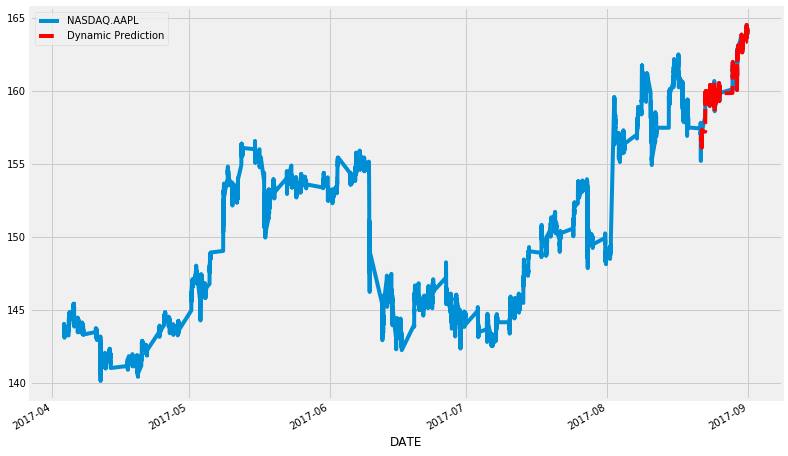

In [303]:
ax = stck_AAPL.ix['2017-04-03 13:30:00':].plot(figsize=(12,8))
ax = predict_stck10.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
#ax.axis((-20.0, 38.0, -4.0, 200.0));

### Calculate Forecast Errors

In [269]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [304]:
print("MFE = ", mean_forecast_err(stck_AAPL, predict_stck10))
print("MAE = ", mean_absolute_err(stck_AAPL, predict_stck10))

MFE =  0.0029860501458688904
MAE =  1.8548958005204292e-05


### For MFE > 0, models tends to under-forecast. However, as long as the tracking signal is between –4 and 4, we assume the model is working correctly. The measure of MAE being small would indicate a pretty good fit.

### We can predict other stocks similarly

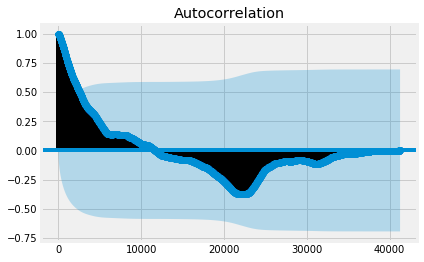

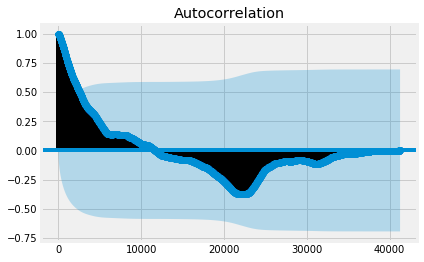

In [272]:
plot_acf(stck_ADP)

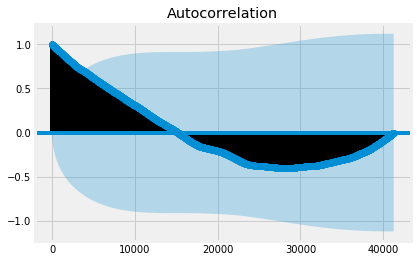

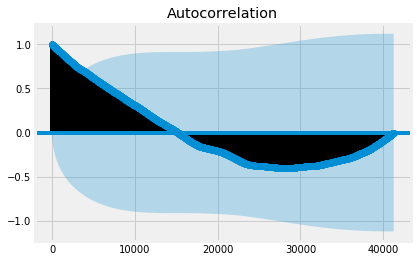

In [285]:
plot_acf(stck_CBOE)

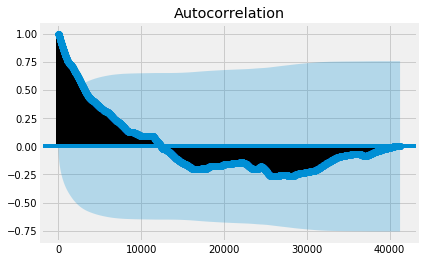

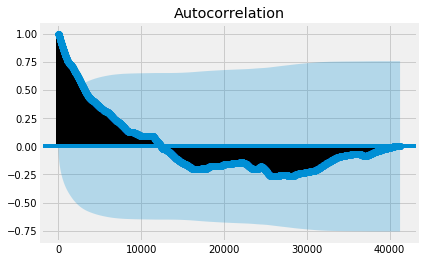

In [286]:
plot_acf(stck_CSCO)

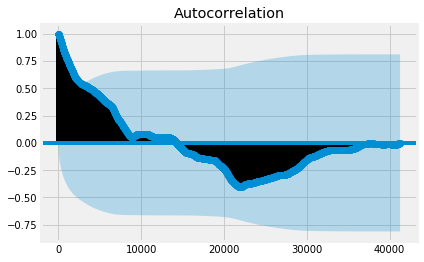

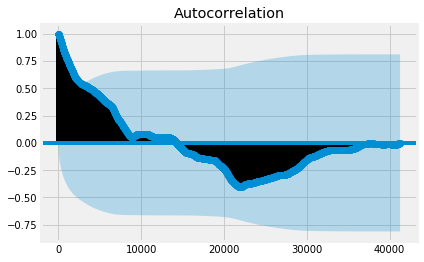

In [287]:
plot_acf(stck_EBAY)

In [305]:
ADP_mod20 = sm.tsa.ARMA(stck_ADP, (2,0)).fit()
CBOE_mod20 = sm.tsa.ARMA(stck_CBOE, (2,0)).fit()
CSCO_mod20 = sm.tsa.ARMA(stck_CSCO, (2,0)).fit()
EBAY_mod20 = sm.tsa.ARMA(stck_EBAY, (2,0)).fit()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it h

In [306]:
print(ADP_mod20.params)
print(CBOE_mod20.params)
print(CSCO_mod20.params)
print(EBAY_mod20.params)

const               103.669491
ar.L1.NASDAQ.ADP      1.056938
ar.L2.NASDAQ.ADP     -0.057101
dtype: float64
const                90.610133
ar.L1.NASDAQ.CBOE     0.924727
ar.L2.NASDAQ.CBOE     0.075260
dtype: float64
const                32.283039
ar.L1.NASDAQ.CSCO     1.015477
ar.L2.NASDAQ.CSCO    -0.015709
dtype: float64
const                34.788141
ar.L1.NASDAQ.EBAY     0.958547
ar.L2.NASDAQ.EBAY     0.041251
dtype: float64


In [307]:
print(ADP_mod20.aic, ADP_mod20.bic, ADP_mod20.hqic)
print(CBOE_mod20.aic, CBOE_mod20.bic, CBOE_mod20.hqic)
print(CSCO_mod20.aic, CSCO_mod20.bic, CSCO_mod20.hqic)
print(EBAY_mod20.aic, EBAY_mod20.bic, EBAY_mod20.hqic)

-97531.45102495782 -97496.93984817644 -97520.54324365119
-136148.44885276072 -136113.93767597934 -136137.5410714541
-200314.69777479745 -200280.18659801607 -200303.78999349082
-193448.92836294603 -193414.41718616465 -193438.0205816394


In [308]:
sm.stats.durbin_watson(ADP_mod20.resid.values)

1.9868722522775228

In [309]:
sm.stats.durbin_watson(CBOE_mod20.resid.values)

1.5153820070853021

In [310]:
sm.stats.durbin_watson(CSCO_mod20.resid.values)

1.8781626641689955

In [311]:
sm.stats.durbin_watson(EBAY_mod20.resid.values)

1.9191502586110956

In [312]:
ADP20 = ADP_mod20.resid
stats.normaltest(ADP20)

NormaltestResult(statistic=71116.25667875189, pvalue=0.0)

In [315]:
CBOE20 = CBOE_mod20.resid
stats.normaltest(CBOE20)

NormaltestResult(statistic=148982.23348495428, pvalue=0.0)

In [316]:
CSCO20 = CSCO_mod20.resid
stats.normaltest(CSCO20)

NormaltestResult(statistic=117378.11679647464, pvalue=0.0)

In [317]:
EBAY20 = EBAY_mod20.resid
stats.normaltest(EBAY20)

NormaltestResult(statistic=57774.92598182133, pvalue=0.0)

In [318]:
start = 38000
end = 41250

In [319]:
predict_ADP20 = ADP_mod20.predict(start, end)
predict_CBOE20 = CBOE_mod20.predict(start, end)
predict_CSCO20 = CSCO_mod20.predict(start, end)
predict_EBAY20 = EBAY_mod20.predict(start, end)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


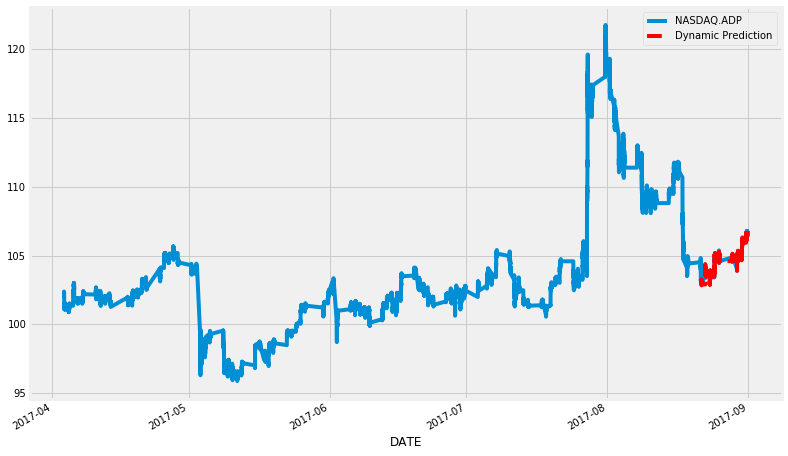

In [320]:
ax = stck_ADP.ix['2017-04-03 13:30:00':].plot(figsize=(12,8))
ax = predict_ADP20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


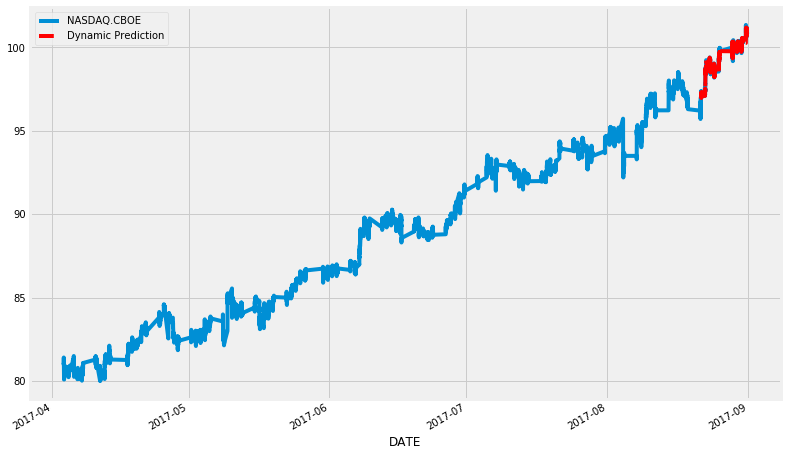

In [321]:
ax = stck_CBOE.ix['2017-04-03 13:30:00':].plot(figsize=(12,8))
ax = predict_CBOE20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


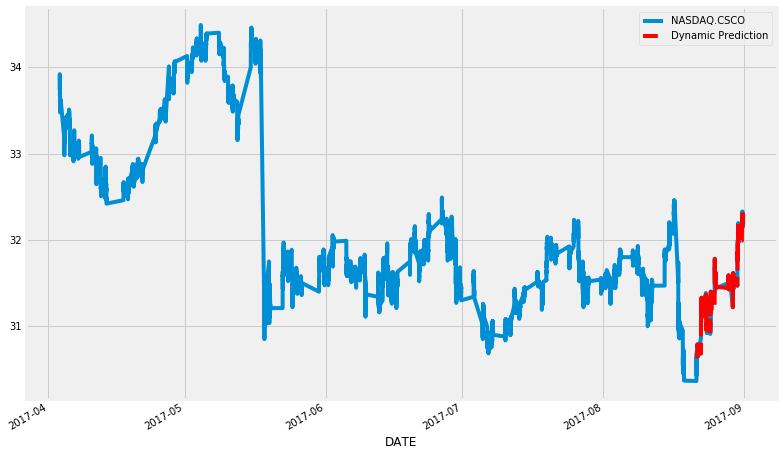

In [322]:
ax = stck_CSCO.ix['2017-04-03 13:30:00':].plot(figsize=(12,8))
ax = predict_CSCO20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


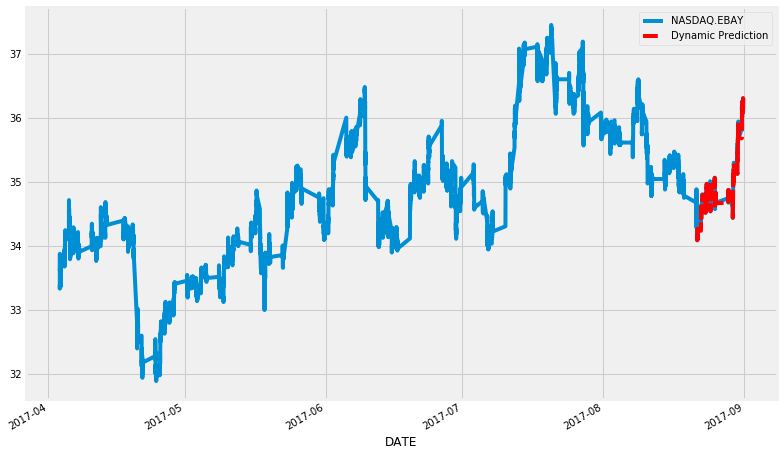

In [323]:
ax = stck_EBAY.ix['2017-04-03 13:30:00':].plot(figsize=(12,8))
ax = predict_EBAY20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();

In [326]:
print("MFE ADP= ", mean_forecast_err(stck_ADP, predict_ADP20))
print("MFE CBOE= ", mean_forecast_err(stck_CBOE, predict_CBOE20))
print("MFE CSCO= ", mean_forecast_err(stck_CSCO, predict_CSCO20))
print("MFE EBAY= ", mean_forecast_err(stck_EBAY, predict_EBAY20))

MFE ADP=  0.0011942592045183784
MFE CBOE=  0.0013358736022330538
MFE CSCO=  0.00031354141490163635
MFE EBAY=  0.0007390479971059831


In [327]:
print("MAE ADP= ", mean_absolute_err(stck_ADP, predict_ADP20))
print("MAE CBOE= ", mean_absolute_err(stck_CBOE, predict_CBOE20))
print("MAE CSCO= ", mean_absolute_err(stck_CSCO, predict_CSCO20))
print("MAE EBAY= ", mean_absolute_err(stck_EBAY, predict_EBAY20))

MAE ADP=  1.140023292669906e-05
MAE CBOE=  1.3437755172854593e-05
MAE CSCO=  9.952719477210144e-06
MAE EBAY=  2.111223689224518e-05


## Thank you!!!